In [1]:
import pandas as pd
data=pd.read_csv('../data/data_included.csv')

C:\Users\Ojas\AppData\Local\Temp\ipykernel_20820\2041111253.py:2: DtypeWarning: Columns (18,19,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../data/data_included.csv')


In [2]:
data=data[data.birth_date.str.len()==10]
data['birth_date']=pd.to_datetime(data['birth_date'], errors='coerce')
data['month']=data['birth_date'].dt.month.astype(str).astype(float)
data['day']=data['birth_date'].dt.day.astype(str).astype(float)

In [3]:
#Taurus—April 20-May 20
taurus=data[((data['month']==4) & (data['day']>19)) | ((data['month']==5) & (data['day']<21))]
#Gemini—May 21-June 20
gemini=data[((data['month']==5) & (data['day']>20)) | ((data['month']==6) & (data['day']<21))]
#Cancer—June 21-July 22
cancer=data[((data['month']==6) & (data['day']>20)) | ((data['month']==7) & (data['day']<23))]
#Leo—July 23-August 22
leo=data[((data['month']==7) & (data['day']>22)) | ((data['month']==8) & (data['day']<23))]
#Virgo—August 23-September 22
virgo=data[((data['month']==8) & (data['day']>22)) | ((data['month']==9) & (data['day']<23))]
#Libra—September 23-October 22
libra=data[((data['month']==9) & (data['day']>22)) | ((data['month']==10) & (data['day']<23))]
#Scorpio—October 23-November 21
scorpio=data[((data['month']==10) & (data['day']>22)) | ((data['month']==11) & (data['day']<22))]
#Sagittarius—November 22-December 21
sagittarius=data[((data['month']==11) & (data['day']>21)) | ((data['month']==12) & (data['day']<22))]
#Capricorn—December 22-January 19
capricorn=data[((data['month']==12) & (data['day']>21)) | ((data['month']==1) & (data['day']<20))]
#Aquarius—January 20-February 18
aquarius=data[((data['month']==1) & (data['day']>19)) | ((data['month']==2) & (data['day']<19))]
#Pisces—February 19-March 20
pisces=data[((data['month']==2) & (data['day']>18)) | ((data['month']==3) & (data['day']<21))]
#Aries—March 21-April 19
aries=data[((data['month']==3) & (data['day']>20)) | ((data['month']==4) & (data['day']<20))]


In [4]:
df=pd.DataFrame([aries.shape[0], taurus.shape[0], gemini.shape[0], cancer.shape[0], leo.shape[0], virgo.shape[0], libra.shape[0], scorpio.shape[0], sagittarius.shape[0], capricorn.shape[0], aquarius.shape[0], pisces.shape[0]] , columns=['count'], index=[ 'Aries','Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'])
df.index=pd.CategoricalIndex(df.index, categories=['Aries','Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'], ordered=True)
df

,count
Aries,3293
Taurus,3527
Gemini,3415
Cancer,3557
Leo,3401
Virgo,3368
Libra,3270
Scorpio,3008
Sagittarius,3164
Capricorn,3226


In [5]:
df['percent']=df['count']/df['count'].sum()*100
df['percent']=df['percent'].round(2)
df

,count,percent
Aries,3293,8.25
Taurus,3527,8.84
Gemini,3415,8.56
Cancer,3557,8.91
Leo,3401,8.52
Virgo,3368,8.44
Libra,3270,8.20
Scorpio,3008,7.54
Sagittarius,3164,7.93
Capricorn,3226,8.09


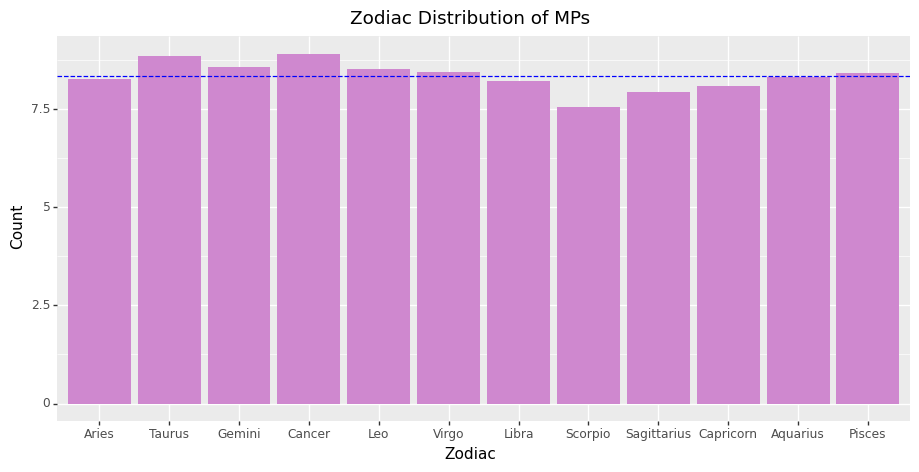

<ggplot: (169757324689)>

In [10]:
from plotnine import *
ggplot(df, aes(x=df.index, y='percent')) \
 + geom_bar(stat='identity', fill='#CF88CF') \
 + labs(x='Zodiac', y='Count') \
 + theme(figure_size=(11,5))\
 + labs(title='Zodiac Distribution of MPs')\
 + geom_hline(yintercept=8.33, linetype='dashed', color='blue')

In [7]:
# Scorpios tend to be loyal and honest, which is why they do not make successful politicians.
# Saggitarians also don't do well because they are optimistic and philosophical.
# Cancerians are charismatic, attractive, and manipulative, which is why they do well in politics.
# Taurus are resolute and pragmatic, which also makes them good politicians.


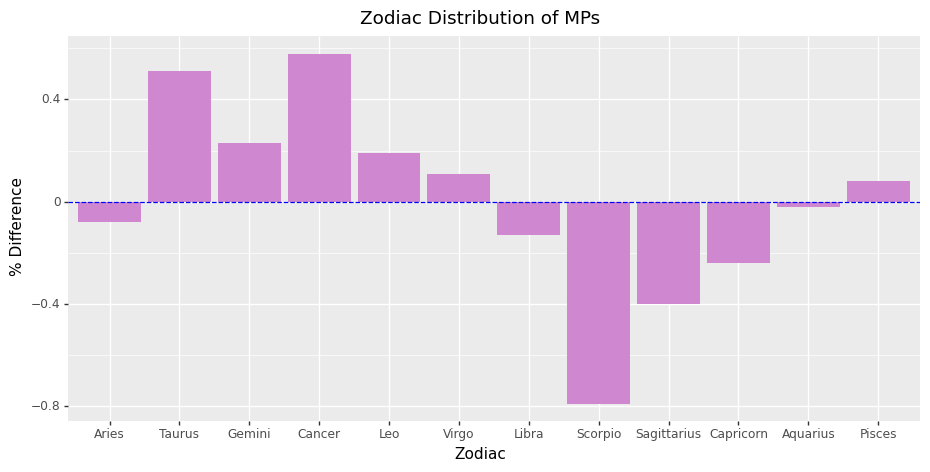

<ggplot: (169756658101)>

In [8]:
df['difference']=df['percent']-8.33
ggplot(df, aes(x=df.index, y='difference')) \
 + geom_bar(stat='identity', fill='#CF88CF') \
 + labs(x='Zodiac', y='% Difference') \
 + theme(figure_size=(11,5))\
 + labs(title='Zodiac Distribution of MPs')\
 + geom_hline(yintercept=0, linetype='dashed', color='blue')